> ### EEE3314-02: Introduction to Artificial Intelligence

# Assignment \# II: Lasso Regression

<div style="text-align: right"> **Due date: Oct. 19, 2018.** </div> 
<div style="text-align: right"> **Please upload your file @ yscec by 9 PM in the form of [ID_Name_HW1.ipynb].** </div> 
<div style="text-align: right"> Beomjun Kim(김범준): <a href="mailto:beomjun.kim@yonsei.ac.kr">beomjun.kim@yonsei.ac.kr</a> </div>
<div style="text-align: right"> Chanho Um(엄찬호): <a href="mailto:chanho0103@yonsei.ac.kr">chanho0103@yonsei.ac.kr</a> </div>

### *Assignement Instructions:*
- Write a program implementing a particular algorithm to solve a given problem.   
- <h4><span style="color:red">**Report and discuss your results. Analyze the algorithm, theoretically and empirically. **</span> </h4>

### *Collaboration policy:*
- You may discuss the questions.   
- Each student writes their own answers.   
- **Write on your homework anyone with whom you collaborate.**   
- Each student must write their own code (<span style="color:red">**if not you will get a F grade**</span>).

<h2><span style="color:blue">[2016142072] [Nam Gil Hyun]</span> </h2>

In [125]:
import datetime
print("This code is written at " + str(datetime.datetime.now()))

This code is written at 2018-10-17 11:39:34.327898


## Problem description

The training set ($\texttt{crime-train.csv}$) consist of local crime statistics for 1,595 communities. We have 95 features to estimate the crime rate denoted by $\texttt{ViolentCrimesPerPop}$. These features include possibly relevant variables such as the size of the police force or the percentage of children that graduate high school. A description of the features in the data set is avaialbe: http://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.names.

Let's use the training set to fit a model which can predict the crime rate in new communities, and evaluate model performance on the test set ($\texttt{crime-test.csv}$). The number of featrues and other statistics are exactly the same as the training set. 

### I. Lasso method 
(*50 points*) P1.1 As there are a considerable number of input variables, overfitting is a serious issue. In order to avoid this, implement the **coordinate descent LASSO algorithm**. Note that you should consider an additional feature to consider **an intercept term**. Your function should accept a scalar value of the regularization parameter $\lambda$, a vector-valued output variable ($y$), a matrix of input variables ($X$), and an initial vector of weights ($w_0$). It should output a vector of coefficient values ($\hat w$).

> Convergence condition: $||\hat w_t - \hat w_{t+1}||_\infty < 10^{-6}$, i.e., $max(abs(\hat w_t - \hat w_{t+1})) < 10^{-6}$, where $t$ is a number of iteration.      
> Loss function = RSS

(*10 points*) P1.2 Plot training error (sum of squared errorr) over the number of itertaions when $\lambda = 600$.

### II. Regularization parameter 
Initially, set $\lambda=600$, and adjust it by cutting it down by a factor of 2 and run again, until we have models for 10 values of $\lambda$ in total. For each trial, set initial weights to $\mathcal{N}(0,1)$ (Normal random variables with mean 0 and variance 1).   

(*10 points*) P2.1 Plot weights (coefficients) for the features $\texttt{agePct12t29}$, $\texttt{pctWSocSec}$, $\texttt{PctKids2Par}$, $\texttt{PctIlleg}$, and $\texttt{HousVacant}$ over $\log(\lambda)$. That is, plot the coefficient paths.     
(*10 points*) P2.2 Plot training error (sum of squared error) over $\log(\lambda)$.    
(*10 points*) P2.3 Plot test error (sum of squared error) over $\log(\lambda)$.   
(*10 points*) P2.4 Plot number of nonzero weights over $\lambda$.   


**P1.1 Implement the coordinate descent LASSO algorithm.**

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data load
data = pd.read_csv('crime-train.csv') 
test_data = pd.read_csv('crime-test.csv')

data.describe() # Check statistical information of data

,ViolentCrimesPerPop,population,householdsize,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn
count,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,...,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000
mean,0.237567,0.000019,-0.005837,0.002458,0.006182,0.003292,0.007862,-0.000125,-0.018038,-0.027787,...,-0.008263,-0.016966,0.012972,-0.015028,0.002270,0.000614,-0.001486,-0.004539,0.000834,0.010113
std,0.230605,1.002158,1.003308,0.993340,1.004134,1.002143,0.993375,1.002550,1.008793,0.991076,...,0.953144,0.999416,1.006326,1.003917,1.000777,1.005137,0.986732,0.990776,1.010965,1.021824
min,0.000000,-0.450000,-2.830000,-2.730000,-3.440000,-2.020000,-2.360000,-0.500000,-1.570000,-1.630000,...,-0.230000,-0.930000,-2.980000,-2.950000,-3.120000,-3.290000,-0.600000,-1.150000,-0.710000,-0.390000
25%,0.070000,-0.380000,-0.690000,-0.540000,-0.580000,-0.520000,-0.690000,-0.500000,-1.570000,-0.795000,...,-0.230000,-0.720000,-0.680000,-0.630000,-0.480000,-0.460000,-0.410000,-0.650000,-0.620000,-0.390000
50%,0.150000,-0.300000,-0.200000,-0.160000,-0.100000,-0.280000,-0.020000,-0.270000,0.680000,-0.240000,...,-0.230000,-0.410000,0.150000,0.030000,0.170000,0.240000,-0.230000,-0.310000,-0.400000,-0.390000
75%,0.330000,-0.060000,0.470000,0.325000,0.320000,0.140000,0.650000,0.050000,0.680000,0.570000,...,-0.230000,0.280000,0.840000,0.660000,0.720000,0.700000,0.040000,0.230000,0.120000,-0.390000
max,1.000000,7.430000,3.280000,3.710000,3.530000,3.990000,3.220000,7.300000,0.680000,3.050000,...,9.730000,3.390000,1.910000,2.560000,1.860000,1.760000,8.540000,3.780000,3.660000,3.770000


In [127]:
test_data.describe() # Check statistical information of test data

,ViolentCrimesPerPop,population,householdsize,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn
count,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,...,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000
mean,0.239624,-0.005414,0.023434,-0.009373,-0.025489,-0.023183,-0.031905,0.000426,0.057469,0.110551,...,0.019148,0.067419,-0.051754,0.059749,-0.001830,-0.002581,0.010727,0.019474,-0.002381,-0.034812
std,0.242556,0.995045,0.987766,1.026359,0.984518,0.995220,1.026695,0.991736,0.967800,1.029028,...,1.171786,0.999369,0.973840,0.982352,1.001273,0.980669,1.050310,1.037078,0.956317,0.905341
min,0.000000,-0.450000,-2.280000,-2.350000,-3.020000,-1.780000,-2.360000,-0.500000,-1.570000,-1.720000,...,-0.230000,-0.930000,-2.980000,-2.840000,-3.120000,-3.290000,-0.600000,-1.150000,-0.710000,-0.390000
25%,0.060000,-0.380000,-0.630000,-0.610000,-0.580000,-0.580000,-0.690000,-0.500000,-1.465000,-0.670000,...,-0.230000,-0.630000,-0.680000,-0.580000,-0.580000,-0.410000,-0.410000,-0.650000,-0.570000,-0.390000
50%,0.150000,-0.300000,-0.080000,-0.160000,-0.170000,-0.280000,-0.070000,-0.270000,0.680000,-0.100000,...,-0.230000,-0.280000,0.010000,0.140000,0.270000,0.240000,-0.230000,-0.260000,-0.360000,-0.390000
75%,0.325000,-0.060000,0.530000,0.290000,0.320000,0.080000,0.540000,0.050000,0.680000,0.735000,...,-0.230000,0.370000,0.740000,0.740000,0.720000,0.700000,0.040000,0.180000,0.120000,-0.390000
max,1.000000,7.430000,3.280000,3.710000,3.530000,3.990000,3.220000,7.300000,0.680000,3.050000,...,9.730000,3.390000,1.770000,2.230000,1.660000,1.350000,8.540000,3.780000,3.660000,3.770000


test data에는 399개의 데이터가 있음을 확인할 수 있다. 트레이닝 데이터의 개수는 1595개이므로 트레이닝 데이터와 테스트 데이터의 비율은 약 4:1이다. .describe 함수를 통해 각 피쳐들에 해당하는 값의 평균, 표준편차, 최댓값, 최솟값등을 확인할 수 있었다.

In [128]:
data_np = data.values  # Change dataframe object to numpy array
test_data_np = test_data.values

y = data_np[:,0] # Data preprocessing
X = data_np[:,1:]
y_t = test_data_np[:,0]
X_t = test_data_np[:,1:]
N = len(data['ViolentCrimesPerPop'].values)
N_t = len(test_data['ViolentCrimesPerPop'].values)
X2 = np.c_[np.ones(N), X] # Consider Intercept term 
X2_t = np.c_[np.ones(N_t), X_t]

w_init = np.random.normal(0,1,96) # Set initial w by normal random


우리가 데이터를 조작하기 쉽게 .values함수를 통해 dataframe객체를 numpy array객체로 만들었다. 이후 종속변수인 ViolentCrimesPerPop 과 나머지 독립변수(95개 피쳐)를 test data와 training data에서 y,X 와 y_t,X_t로 분리하였다.
문제 1에서 intercept를 고려한다고 하였으므로 전부 1인 열을 X에 추가한 array를 생성하였다.
이후 coordinate descent LASSO 알고리즘을 구현한 Lasso_fit 함수에 인자로 들어가게 되는 initial w를 성분들이 평균이 0이고 분산이 1인 표준정규분포를 만족하는 값으로 생성하였다.

In [129]:
def Lasso_fit(X, y,lambda_,w): # Implementing Coordinate descent LASSO algorithm function
    error_history = []
   
    def soft_threshold(x, l): # Define soft_threshold function
        if x  < -l/2:
            return x + l/2
        elif x > l/2:
            return x - l/2
        else:
            return 0
    
    
    while(1):
        
        prev_w = w.copy()
        for j in range(0, len(w)): # Updating w
            
            
            w[j] = 0.0
            r_j = y - np.dot(X, w)
            p_j = np.dot(X[:, j], r_j) # Calculate p_j
            z_j = np.sum((X[:, j]**2))
            
            if j == 0: # Don't penalize the intercept
                w[j] = p_j/z_j
            else:
                w[j] = soft_threshold(p_j, lambda_)/z_j # Applying soft_threshold
            
        
        if np.max(np.abs(w-prev_w))<10**-6: # Checking converge condition
            break
       
        
        error_history.append(np.sum((r_j) ** 2)) # Saving training error(RSS) 
      
        
    return w, error_history # Return updated weights and error history





문제 1번의 요구사항인 coordinate descent LASSO 알고리즘을 구현한 Lasso_fit 함수를 만들었다. 이 함수는 인자로는 X, y, lambda, initial w를 받고 수렴조건을 만족하는 최종 w(weight)와 iteration마다 구해진 LASSO total cost가 저장된 리스트를 반환한다.

LASSO Regression의 ridge와 대비되는 가장 큰 특징은 손실함수이다. 손실함수는 다음과 같다.
\\(LASSOtotalcost =Average RSS(w)+\lambda { \left\| w \right\|  }_{ 1 } = \sum _{ i=1 }^{ N }{ { ({ y }_{ i }-\sum _{ j=0 }^{ D }{ { w }_{ j }{ h }_{ j }({ x }_{ i })) }  }^{ 2 } } + \lambda \sum _{ j=0 }^{ D }{ \left| { w }_{ j } \right|  } \\)

이때 intercept항은 overfitting과 무관하므로 penalize하면 안된다. 따라서 j가 0일때와 아닐 때로 나누어서 intercept항은 penalize 하지 않았다.
우리의 목표는 이 손실함수를 \\({ w }_{ j }\\) 로 미분했을 때 0이 되는 가중치를 구하는 것이다.
손실함수를 미분할 때 L1 norm은 미분이 불가능하므로 subgradient라는 방법을 사용한다.
미분 결과는 \\({ \rho }_{ j }\\)가 0보다 클때, 0일때, 0보다 작을 때로 나누어진다. 이때 세 범위로 나누어지는 \\({ w }_{ j }\\)가 우리가 찾는 솔루션이 된다.  

\\({ \rho }_{ j }\\)가 \\(\left[ -\lambda /2,\lambda /2 \right] \\)안에 있을 때 (\\({ \rho  }_{ j }={ h }_{ j }({ x }_{ i })({ y }_{ i }-\hat { { y }_{ i } } (\hat { { w }_{ -j } } ))\\)) \\({ w }_{ j }\\)값은 0이 되며 이는 feature들을 sparse하게 하는 LASSO Regression의 특징이 된다. 이 과정을 Soft thresholding 이라고 한다. 마지막으로 현재 normalized되지 않은 feature들을 사용하고 있기  때문에 결과값을 \\({ z }_{ j } = \sum _{ i=1 }^{ N }{ { h }_{ j }{ ({ x }_{ i }) }^{ 2 } } \\) 로 나눠주어야 한다. 이러한 과정들을 이전w값을 사용하여 수렴조건을 만족할 때까지 반복한 후 최종 w를 반환하게 코딩하였다. 저번 숙제처럼 시그마는 내적인 np.dot함수를 활용하여 계산하였다.  cost를 계산할 때는 문제에서 training error 는 RSS를 사용하라고 했으므로 np.sum을 이용해서 구하였다.

In [130]:
Final_w, error_history = Lasso_fit(X2,y,600,w_init) # Find results of final weights and error history when lambda is 600

**P1.2 Plot training error (sum of squared errorr) over the number of itertaions when λ=600 .**

In [133]:
error_history

[11752.557712998692,
 6085.064433558018,
 4176.88586182931,
 3161.6288522242776,
 2282.2392797549246,
 2049.0474856948995,
 1787.5116532518587,
 1276.9805912129636,
 821.7951228712507,
 613.6478922562906,
 471.4459761281137,
 287.5411971551347,
 76.41184897131009,
 80.55510804304006,
 84.76702448491591,
 84.76696150470218]

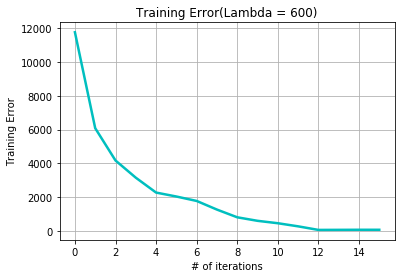

In [134]:
xp = range(0,len(error_history))
yp = [error_history[v] for v in xp]

# Plot the graph
plt.plot(xp,yp,'c-',lw=2.5)
plt.xlabel('# of iterations')
plt.ylabel('Training Error')
plt.title('Training Error(Lambda = 600)')
plt.grid(True)
plt.show()

P1.2에 사용하기 위해서 람다가 600일때 Lasso_fit함수를 실행하고 w값과 training error를 저장하였다.
저장된 training error 값들을 확인해 보았다. 15개의 값이 나오는데 이는 루프를 15번 돌고 수렴조건을 만족해서 루프를 나왔다는 것을 의미한다.
단 이는 항상 같은것이 아니고 error값들도 마찬가지다. 몇번 해본 결과 13 ~ 23번 정도로 루프를 도는 것을 알 수 있었다. 그 이유는 initial w가 np.random.normal을 통해 생성한 표준정규분포를 만족하는 랜덤한 수이기 때문이다. 물론 루프를 나오게 되는 맨 마지막 값은 거의 같음을 확인할 수 있다.
error history와 그래프를 보면 처음 에러는 11752 정도였는데 대략 exponential하게 지속적으로 줄어서 마지막 에러는 84정도인 것으로 보아 알고리즘이 어느 정도 맞음을 확인할 수 있다.
또한 처음에 할때는 intercept항도 penalize했었는데 error가 이정도보다 크게 나왔었다.(대략 25000~) 그래서 실제로 intercept항에 대한 영향도 체감할 수 있었다.

**P2**

In [136]:
w_all = np.random.normal(0,1,(10,96))
training_error_all = np.random.normal(0,1,10)


In [145]:
lambda_set = [0.5859375,1.171875,2.34375,4.6875,9.375,18.75,37.5,75,150,300] # set of 10 lambda values
for i, lam in enumerate(lambda_set): # Make whole weights and training error (according to lambda value) set
    w_all[i], eh1  = Lasso_fit(X2,y,lam,np.random.normal(0,1,96))
    training_error_all[i] = eh1[-1]

In [146]:
training_error_all

array([26.23810606, 26.52965303, 27.11990686, 27.97751642, 28.57193219,
       29.22704694, 30.35747936, 32.58550961, 38.11422172, 50.96052489])

In [147]:
w_s = np.random.normal(0,1,(10,5))
log_lambda_set = [np.log2(i) for i in lambda_set] # set of 10 log lambda values

for i in range(10): # Make selected features(5) weight (according to lambda value) set
    w_s[i] = [w_all[i][4],w_all[i][13],w_all[i][40],w_all[i][46],w_all[i][67]]

문제 2번에서는 600부터 1/2로 감소하는 10개의 값에 따른 w값 중 'agePct12t29','pctWSocSec','PctKids2Par','PctIlleg','HousVacant' 이 5개의 feature에 해당하는 값들을 plot해야한다. 인덱싱과 for문을 활용해 우리가 필요한 w값들을 w_s라는 array에 전부 저장하였다. 이후 문제에서 log lambda값에 따라 weight들을 plot해야 하기 때문에 밑이 2인 log를 취한 값들을 log_lambda_set에 저장하였다. 또한 10개의 람다값마다 최종 트레이닝 에러를 training_error_all에 저장하였다. 10개의 값들은 np.random.normal에 의해 생성된 모두 다른 initail w를 가진다.

**P2.1 Plot weights (coefficients) for the features  𝚊𝚐𝚎𝙿𝚌𝚝𝟷𝟸𝚝𝟸𝟿,  𝚙𝚌𝚝𝚆𝚂𝚘𝚌𝚂𝚎𝚌,  𝙿𝚌𝚝𝙺𝚒𝚍𝚜𝟸𝙿𝚊𝚛,  𝙿𝚌𝚝𝙸𝚕𝚕𝚎𝚐 , and  𝙷𝚘𝚞𝚜𝚅𝚊𝚌𝚊𝚗𝚝 over log⁡(λ) . That is, plot the coefficient paths.**

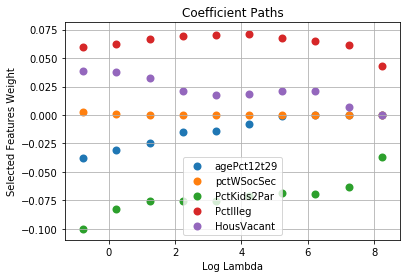

In [148]:
# Plot coefficient paths
plt.scatter(log_lambda_set,w_s[:,0],lw=2, label = 'agePct12t29')
plt.scatter(log_lambda_set,w_s[:,1],lw=2, label = 'pctWSocSec')
plt.scatter(log_lambda_set,w_s[:,2],lw=2, label = 'PctKids2Par')
plt.scatter(log_lambda_set,w_s[:,3],lw=2, label = 'PctIlleg' )
plt.scatter(log_lambda_set,w_s[:,4],lw=2, label = 'HousVacant' )
plt.xlabel('Log Lambda')
plt.ylabel('Selected Features Weight')
plt.title('Coefficient Paths')

plt.legend()
plt.grid(True)
plt.show()

5종류의 feature에 해당하는 weight값들을 lambda에 따라 plot하였다. 이러한 그래프를 coefficient paths라고 한다. x축에 log lambda를 사용하는 이유는 값들을 모으기 위해서이다. 위의 그래프를 보면 다양한 사실들을 확인할 수 있다. 첫째로는 람다값이 커질수록 feature들의 weight값이 0에 가까워지는 것을 확인할 수 있다. LASSO regression의 특징인 weight값들을 0으로만들어서 sparse하게 만든다는것을 알 수 있다. 그래프에서 보면 5개 feature중 3개가 log lambda값이 8이상일때 0이되는것을 확인할 수 있다. 'PctKids2Par','HousVacant'나 'PctIlleg'과 같이 상대적으로 늦게 수렴하는 feature들은 아닌 것들보다 더 중요(y값을 예측하는데 있어서 영향력이 큰)하다고 생각할 수 있다.  feature들에대한 설명이 나와있는  http://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.names 를 참고하면 'PctKids2Par'는 2인 부모를 가진 가정에서 자녀의 비율을 나타내고 'PctIlleg'는 부모가 결혼하지 않은 상태에서 태어난 아이의 비율이고 'HousVacant'는 1인 가정의 수를 나타낸다고 한다.
이 결과에 따르면 사회보장소득을 받는 가정의 비율(pctWSocSec)이나 전체 인구에서 12세-29세가 차지하는 비율(agePct12t29)은  폭력 범죄율에 상대적으로 적은 영향을 미치고  부모 모두 온전한 가정에서 자라고 가족과 함께 사는 사람들의 비율이 더 중요함을 알 수 있다. 

 또한 가중치 값이 '-'인 feature들은 feature값이 클수록 적은 범죄율에 기여하고 가중치 값이 '+'인 feature들은 값이 클수록 범죄율 증가에 더 기여한다는 것을 알 수 있다. 이러한 정보들을 종합해 봤을 때 이 5개 feature들을 가지고 내릴 수 있는 결론은 다음과 같다. 
폭력 범죄는 온전하고 화목한 가정에서 자라지 못한 사람들이 많을수록 많이 일어나고 가정의 부유함은 큰 관련이 없다. 또한 크진 않지만 젊은 사람들이 많을수록 덜 일어나는 경향이 있다. 
나타난 결과를 바탕으로 추가적으로 내 의견을 덧붙이자면 함께 사는 가족이 있으면 그렇지 않은 사람들보다 공감을 더 잘하기 때문에 다른 사람들에게 치명적인 타격을 주는 폭력 범죄를 덜 일으키는 것 같다. 

**P2.2 Plot training error (sum of squared error) over  log(λ).**

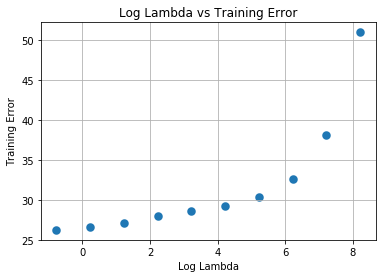

In [149]:
# Plot Log Lambda vs Training Error
plt.scatter(log_lambda_set,training_error_all,lw=2.5)
plt.xlabel('Log Lambda')
plt.ylabel('Training Error')
plt.title('Log Lambda vs Training Error')
plt.grid(True)
plt.show()

그래프를 보면 람다값이 클수록 트레이닝 에러가 증가함을 확인할 수 있다. x축을 로그 람다로 한 것은 coefficient paths와 같이 값들을 모으기 위해서이다. 그렇지 않으면 x축의 양의 방향으로 퍼진다. 트레이닝 에러의 증가 이유는 람다값이 클수록 soft threshold를 거치며 0이되는 weight값들이 많아져서 예측에 중요한 weight값들까지 사라지기 때문에 종속변수y의 값과 차이가 커지기 때문이다. 

**P2.3 Plot test error (sum of squared error) over  log(λ).**

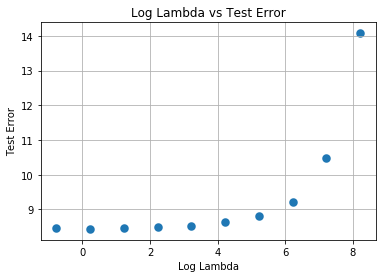

In [154]:

def error_calculate(X, y, w): # Implementing error calculation function
 
    r_j = y - np.dot(X, w)
    error = np.sum((r_j) ** 2) # Saving error (RSS) 
    
    return error 


test_error_all = np.random.normal(0,1,10) # Make test error (according to lambda value) set

for i in range(len(lambda_set)):
    
    test_error_all[i] = error_calculate(X2_t,y_t,w_all[i])

# Plot Log Lambda vs Test Error
plt.scatter(log_lambda_set,test_error_all,lw=2.5)

plt.xlabel('Log Lambda')
plt.ylabel('Test Error')
plt.title('Log Lambda vs Test Error')
plt.grid(True)
plt.show()

In [155]:
test_error_all

array([ 8.45732979,  8.4226804 ,  8.45239697,  8.49095863,  8.51033856,
        8.65076884,  8.82216522,  9.21134462, 10.49379033, 14.08977591])

 테스트 에러도 트레이닝 에러와 거의 마찬가지로 람다가 증가할수록 높아지는 경향을 보인다. 다만 전체적으로 에러 값이 트레이닝 에러보다 작은 편임을 확인할 수 있다. 이는 test data set의 개수가 training data의 개수보다 작아서 RSS항이 작을 수밖에 없기 때문일 것이다. 람다값이 증가할수록 error의 값이 증가하는 것은 해당 람다값을 적용했을 때 soft thresholding에서 대부분의 값이 0이 되기 때문일 것이다.

람다가 600부터 10개로 했을 때는 test error가 중간에 감소하는 구간이 없이 계속 증가해서 추가적인 실험으로 람다 값을 300부터 10개로 해 보았다.
이때 테스트 에러에서는 트레이닝 에러와는 달리 람다값이 0.5859일때의 에러값(8.45)이 람다값이 1.1718때의 에러값(8.42)보다 좀더 큼을 알 수 있는데, 이는 model complexity가 증가했는데 (람다값 감소) training error는 감소함과 달리 test error가 증가했으므로 test error를 true error로 본다면 overfitting이 일어났다고 볼 수 있다. 람다가 아주 작을 때 overfitting이 일어나고 람다가 어느 정도 커지면 overfitting이 일어나지 않는 것으로 보아 LASSO regression의 regularization term이 실제로 overfitting 방지에 기여한다는 것을 확인할 수 있었다.

**P2.4 Plot number of nonzero weights over  λ.**

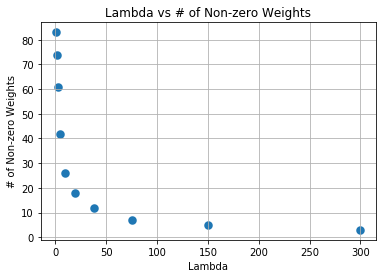

In [156]:
nnzw = [] # Make # of non zero weights(according to lambda value) set
for i in range(10):
    nnzw.append(np.sum(w_all[i]!=0))
    
plt.scatter(lambda_set,nnzw,lw=2.5) # Plot'Lambda vs # of Non-zero Weights
plt.xlabel('Lambda')
plt.ylabel('# of Non-zero Weights')
plt.title('Lambda vs # of Non-zero Weights')
plt.grid(True)
plt.show()

이 그래프를 보면 확실히 LASSO Regression의 특징을 알 수 있다. Ridge Regression은 iteration을 반복해도 weight값이 0이 되지는 않지만 LASSO Regression은 soft thresholding을 통해 \\({ \rho }_{ j }\\)가 \\(\left[ -\lambda /2,\lambda /2 \right] \\)안에 있을 때 0이되므로 weight값을 0으로 만들어서 상대적으로 덜 중요한 weight을 0으로 만든다. 람다가 클수록 해당 범위가 커지므로 0이되는 weight값이 많아진다. 
그래프는 이 사실을 확인시켜준다. 람다값이 증가할수록 0이 아닌 weight값들이 감소하고 람다가 600일때는 거의 0임을 확인할 수 있다. 실제로 람다가 600일때는 한개의 weight만 0이 아니다. 또한 람다 값이 작을 때 감소폭이 더 큰 것을 확인할 수 있다. 
람다가 600과 같이 너무 클때는 거의 weight값이 0이므로 정확한 예측을 할 수 없을 것이므로 coordinate descent를 사용할 때는 자신이 핵심적인 몇개의 feature만 사용할 것인지 정해서 람다값을 적절히 설정해주는것이 중요할 것이다. 